# Load training data

In [ ]:
from pathlib import Path
import pandas as pd
#load metadata
#data can be downloaded from https://huggingface.co/datasets/imageomics/sentinel-beetles
root = Path("/path/to/csv/files")
train_df = pd.read_csv(root / "public_release" / "train.csv")
val_df = pd.read_csv(root / "public_release" / "val.csv")
#combine all train data(training and validation set)
df = pd.concat([train_df, val_df], ignore_index=True)
#display example of data structure
df.head()

,SPEI_1y,SPEI_2y,SPEI_30d,public_id,eventID,domainID,scientificName,siteID,collectDate,relative_img_loc,colorpicker_path,scalebar_path
0,1.130,1.010,1.690,1232272423,72,4,Synuchus impunctatus,9,2018-08-28,1232272423.png,colorpicker_554767701.png,scalebar_554767701.png
1,-0.086,-0.018,-0.946,3357037215,861,46,Pterostichus coracinus,21,2018-09-13,3357037215.png,colorpicker_638323181.png,scalebar_638323181.png
2,-1.690,-1.130,0.320,3488860855,1329,202,Cymindis planipennis,4,2022-08-03,3488860855.png,colorpicker_3723298859.png,scalebar_3723298859.png
3,-1.220,-0.240,-1.930,4125529729,1421,202,Cratacanthus dubius,30,2020-07-15,4125529729.png,colorpicker_2402283423.png,scalebar_2402283423.png
4,0.170,-0.320,-0.270,312276435,1806,99,Scaphinotus oreophilus,27,2019-04-24,312276435.png,colorpicker_1401328123.png,scalebar_1401328123.png


# Understand size of data

In [10]:
print(f'Total number of images: {len(df)}')
print(f'Total number of domains in training data: {df['domainID'].nunique()}')
print(f'Total number of events in training data: {df['eventID'].nunique()}')

Total number of images: 24801
Total number of domains in training data: 10
Total number of events in training data: 1096


# Understand range of data

In [11]:
#SPEI_30d
print(f'SPEI_30 min value of {df['SPEI_30d'].min()} and max value of {df['SPEI_30d'].max()} with a mean of {df['SPEI_30d'].mean()} and std of {df['SPEI_30d'].std()}')
#SPEI_1y
print(f'SPEI_1y min value of {df['SPEI_1y'].min()} and max value of {df['SPEI_1y'].max()} with a mean of {df['SPEI_1y'].mean()} and std of {df['SPEI_1y'].std()}')
#SPEI_2y
print(f'SPEI_2y min value of {df['SPEI_2y'].min()} and max value of {df['SPEI_2y'].max()} with a mean of {df['SPEI_2y'].mean()} and std of {df['SPEI_2y'].std()} \n')

#range of collection date

#make sure collectDate is in date format
df['collectDate'] = pd.to_datetime(df['collectDate'], format='mixed')

print(f'first collection date: {df['collectDate'].min()}')
print(f'last collection date: {df['collectDate'].max()}')

SPEI_30 min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.13697329408570919 and std of 0.9961939349273434
SPEI_1y min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.4513530846359823 and std of 1.0569772015133259
SPEI_2y min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.5464452264173837 and std of 1.1132761390652826 

first collection date: 2014-06-03 00:00:00
last collection date: 2023-10-11 00:00:00


# Visualize data

Text(0.5, 1.0, 'Number of images per site, colored by domain')

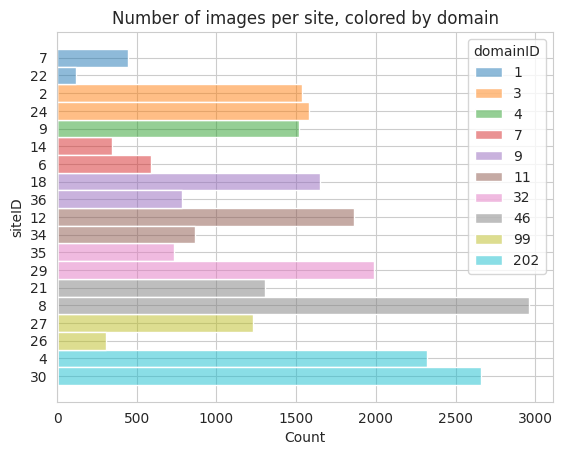

In [12]:
#visualize sites and domains
import seaborn as sns

sns.set_style("whitegrid")
df = df.sort_values("domainID")
df["domainID"] = df["domainID"].astype(str)
df["siteID"] = df["siteID"].astype(str)
ax = sns.histplot(df, y = "siteID", hue = "domainID")
ax.set_title("Number of images per site, colored by domain")

/tmp/ipykernel_4169896/2080895536.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


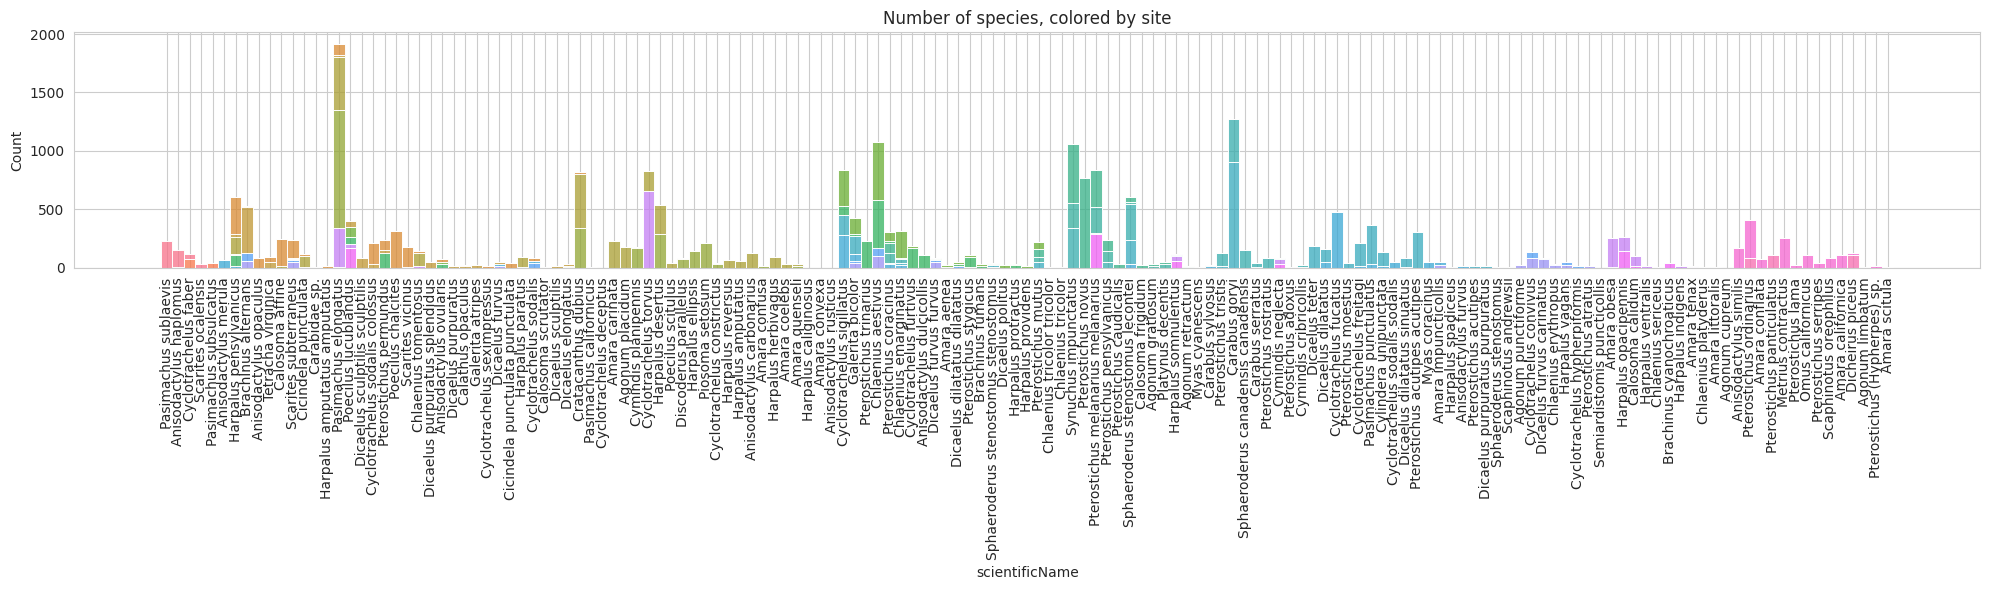

In [13]:
#visualize species
import matplotlib.pyplot as plt

df = df.sort_values("domainID")
df["domainID"] = df["domainID"].astype(str)
df["siteID"] = df["siteID"].astype(str)
plot_m = plt.figure(figsize=(20, 6))
ax = sns.histplot(df, x = "scientificName", hue = "siteID", multiple="stack")
ax.set_title("Number of species, colored by site")
ax.legend_.remove()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()

Text(0.5, 1.0, 'Number of images per date, colored by domain')

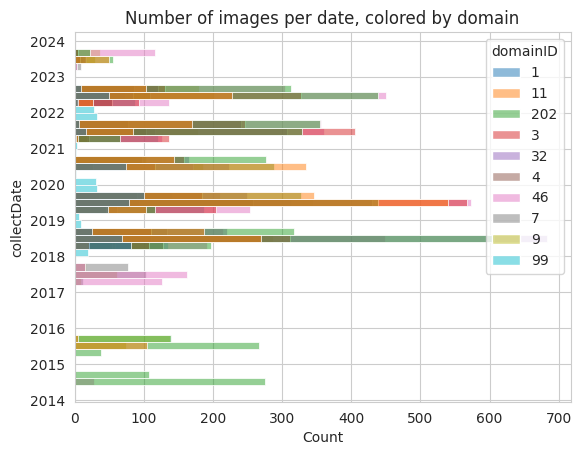

In [14]:
#visualize images per date
ax = sns.histplot(df, y="collectDate", hue="domainID")
ax.set_title("Number of images per date, colored by domain")

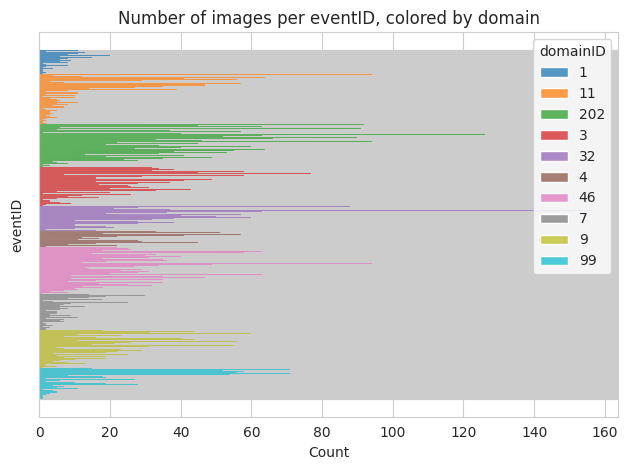

In [15]:
#visualize distribution of events per domain
df = df.sort_values("domainID")
df["domainID"] = df["domainID"].astype(str)
df["siteID"] = df["siteID"].astype(str)
df["eventID"] = df["eventID"].astype(str)
ax = sns.histplot(df, y = "eventID", hue = "domainID", multiple="stack")
ax.set_title("Number of images per eventID, colored by domain")
ax.set_yticklabels([])

plt.tight_layout()

Text(0.5, 1.0, 'SPEI_30d distribution')

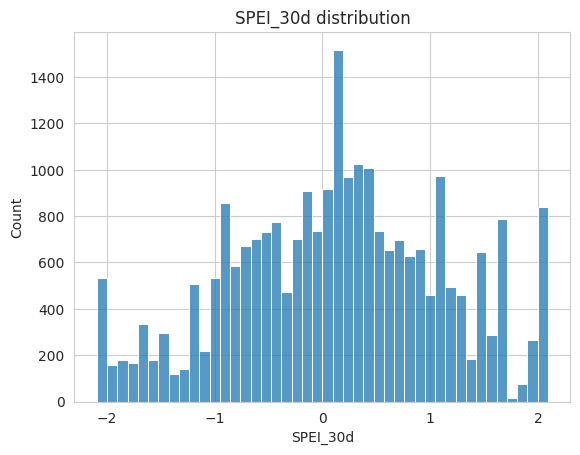

In [16]:
#overall distributions
ax = sns.histplot(df, x='SPEI_30d')
ax.set_title('SPEI_30d distribution')



Text(0.5, 1.0, 'SPEI_1yr distribution')

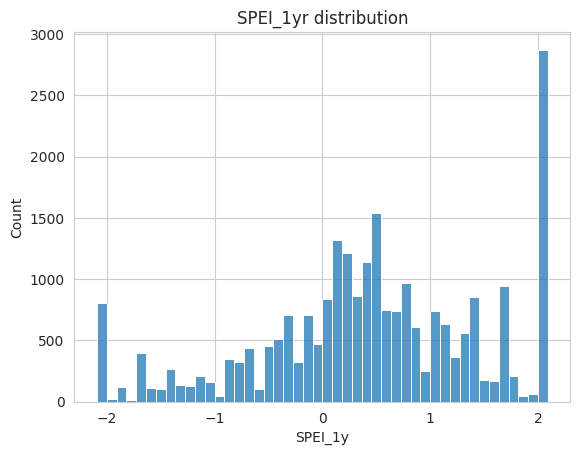

In [17]:
ax = sns.histplot(df, x='SPEI_1y')
ax.set_title('SPEI_1yr distribution')



Text(0.5, 1.0, 'SPEI_2yr distribution')

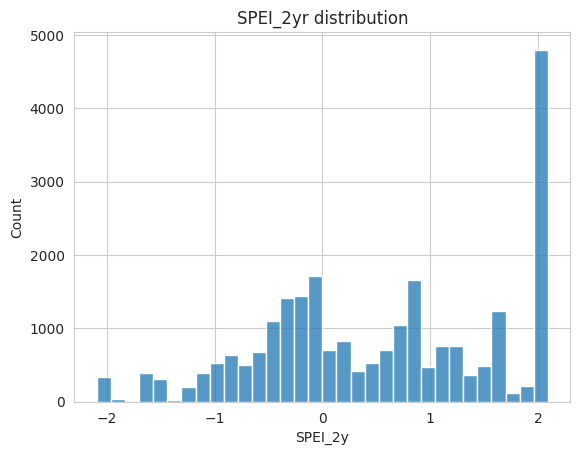

In [18]:
ax = sns.histplot(df, x='SPEI_2y')
ax.set_title('SPEI_2yr distribution')

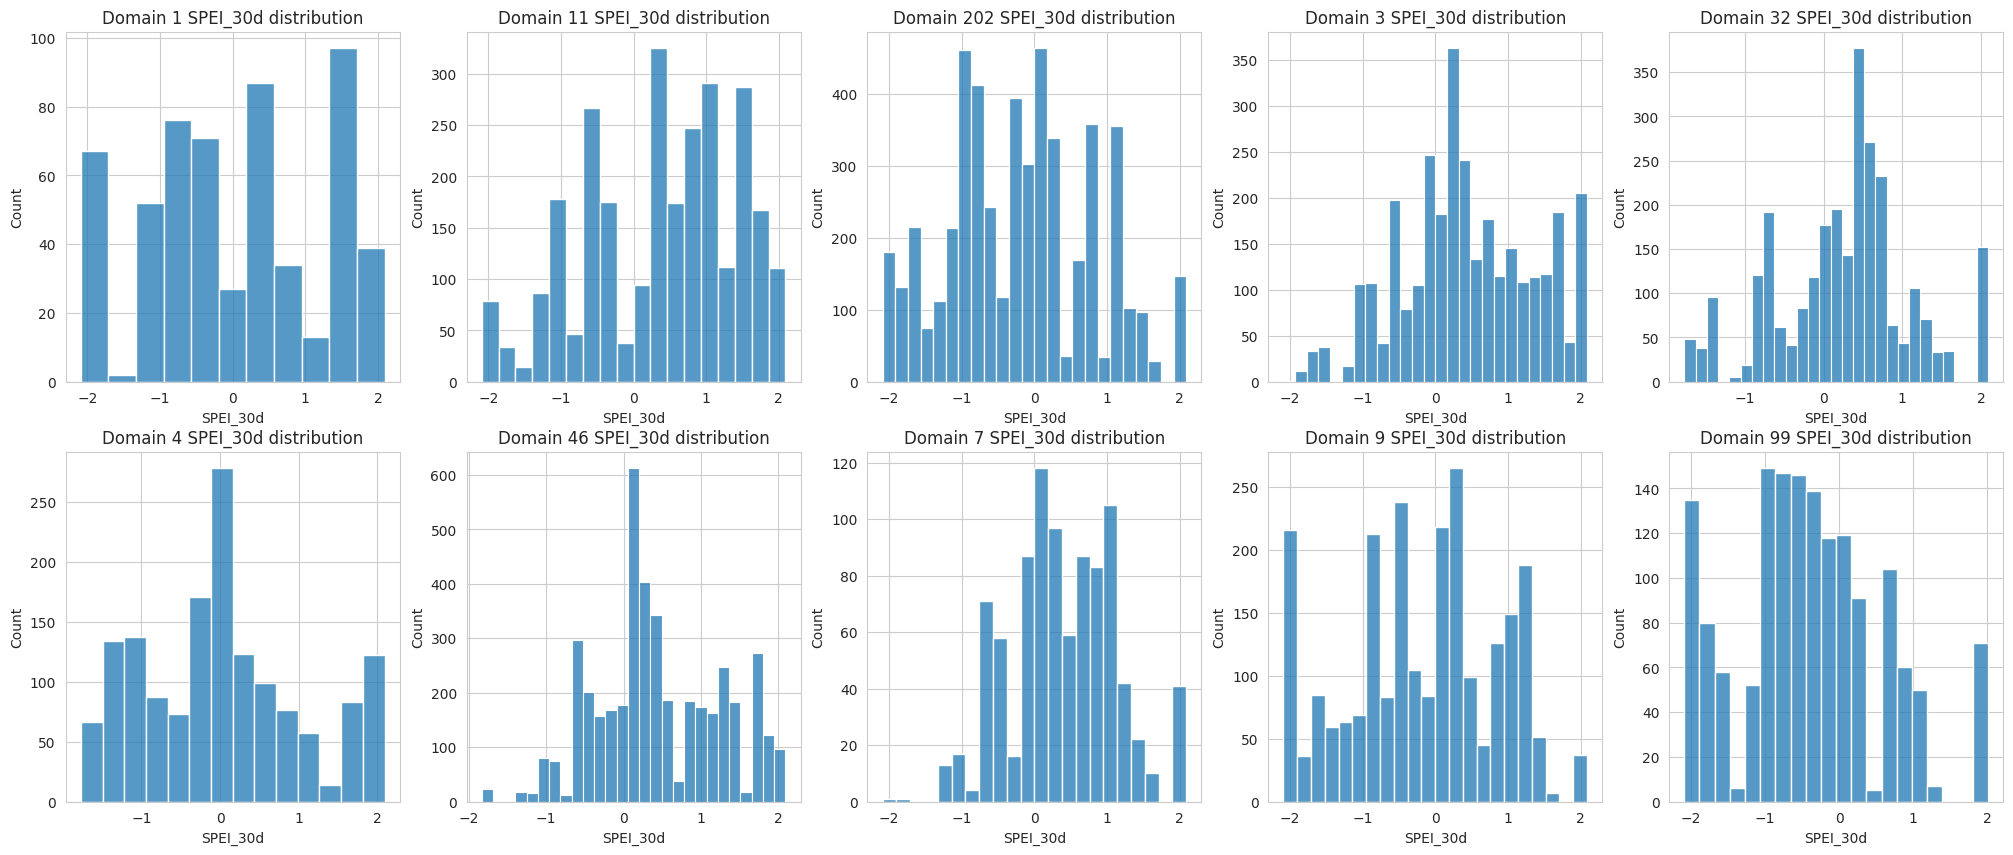

In [19]:
#30d SPEI distribution
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
domain_ids = df["domainID"].unique()
for i, domain_id in enumerate(domain_ids):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    sns.histplot(df[df['domainID'] == domain_id], x="SPEI_30d", ax=ax)
    ax.set_title(f"Domain {domain_id} SPEI_30d distribution")


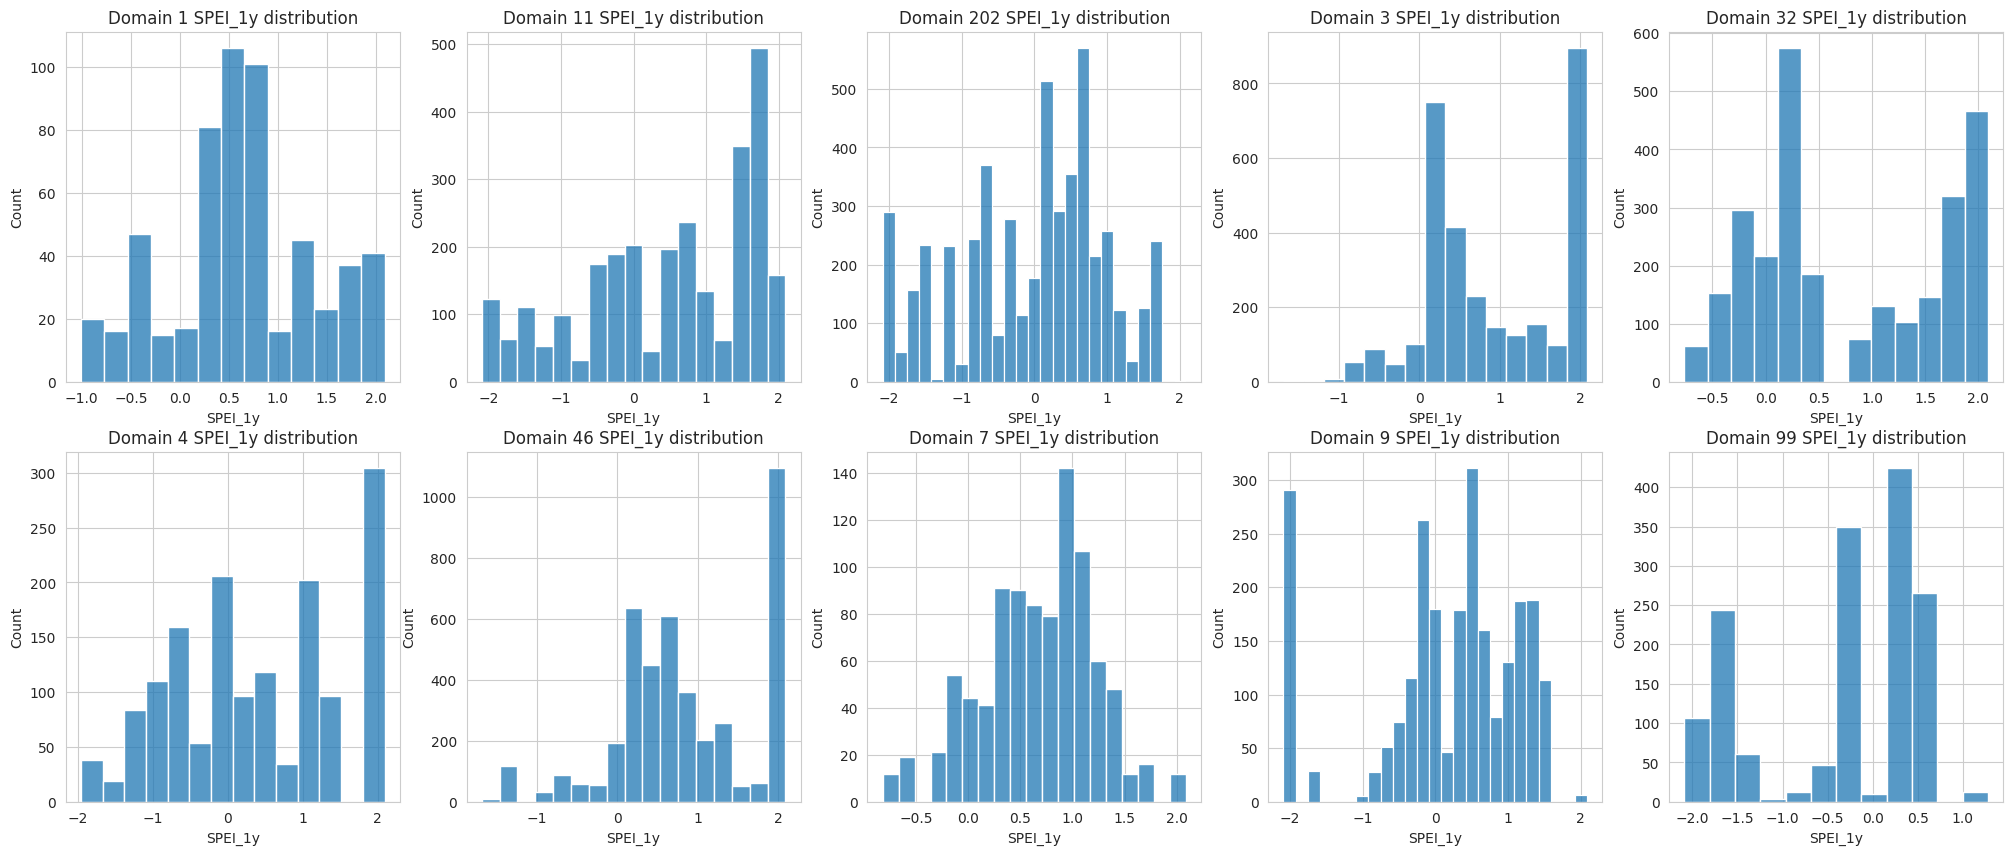

In [20]:
#1y SPEI distribution
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
domain_ids = df["domainID"].unique()
for i, domain_id in enumerate(domain_ids):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    sns.histplot(df[df['domainID'] == domain_id], x="SPEI_1y", ax=ax)
    ax.set_title(f"Domain {domain_id} SPEI_1y distribution")


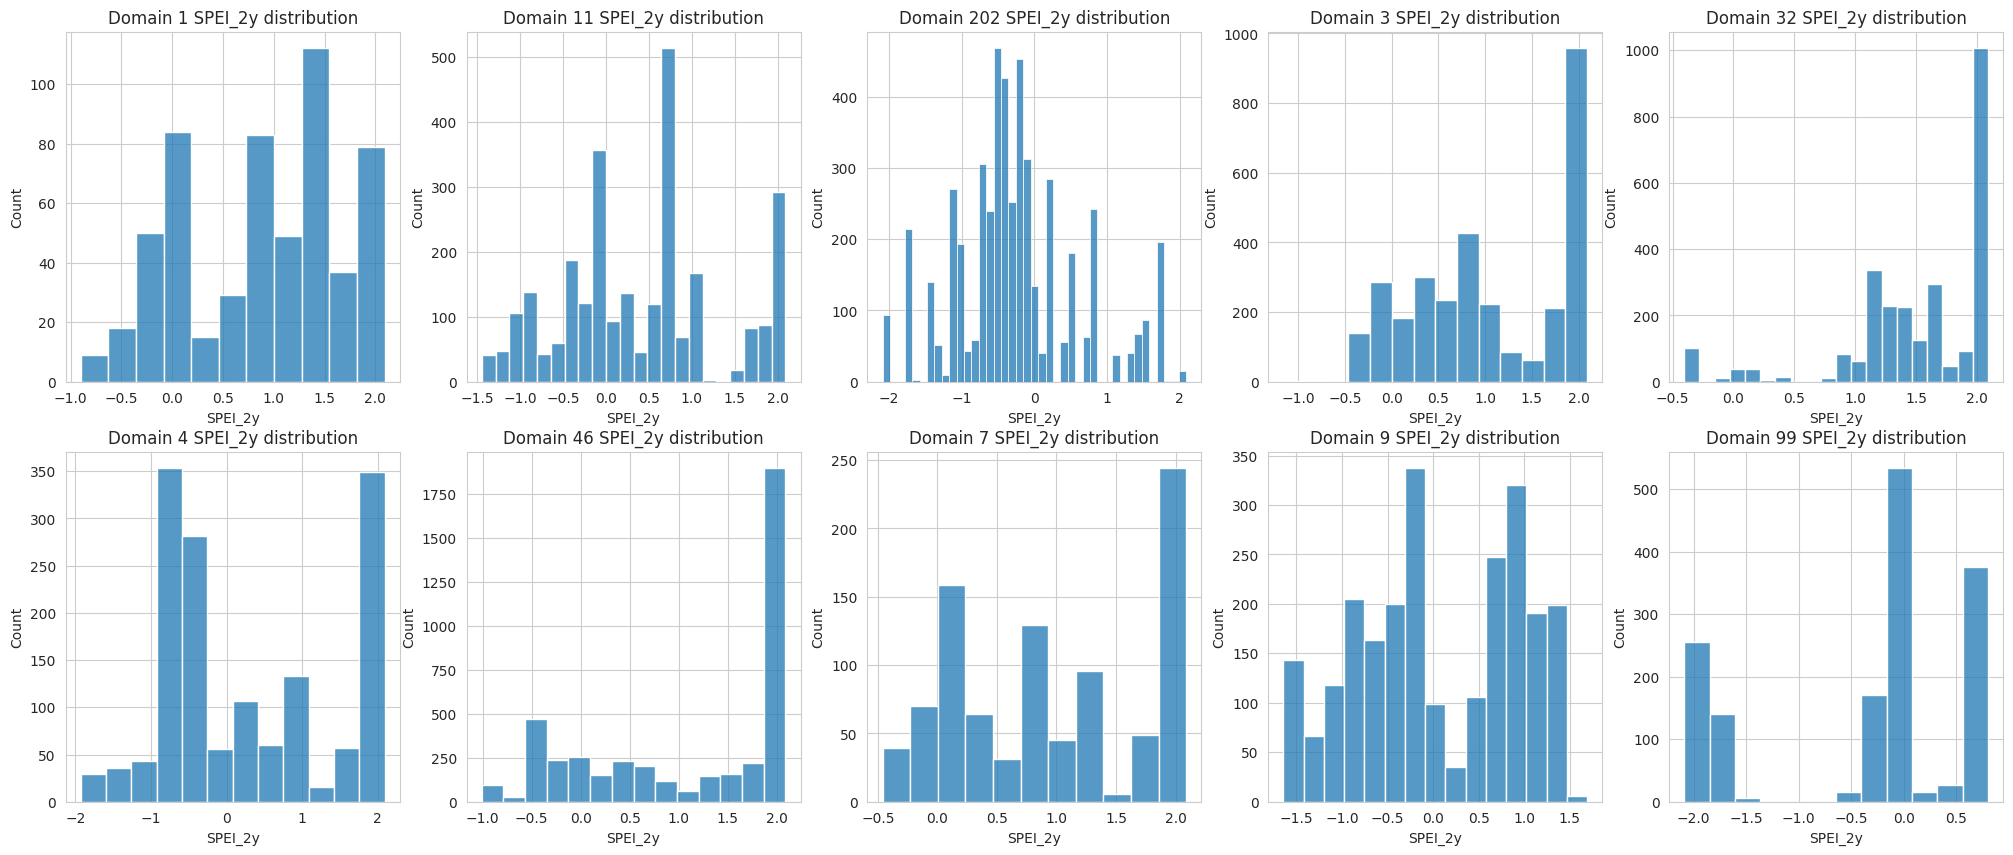

In [21]:
#2y SPEI distribution
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
domain_ids = df["domainID"].unique()
for i, domain_id in enumerate(domain_ids):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    sns.histplot(df[df['domainID'] == domain_id], x="SPEI_2y", ax=ax)
    ax.set_title(f"Domain {domain_id} SPEI_2y distribution")
